In [1]:
%matplotlib inline

import os

import httpimport
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import scipy.stats as sstats

import seaborn as sns
from sklearn import datasets


# Zadanie 1

In [791]:
import time
def KNN(train_X, train_Y, test_X, ks, verbose=False):
    # Casts data to float32
    train_X = train_X.astype(np.float32)
    test_X = test_X.astype(np.float32)

    train_X_square_lengths = np.sum(train_X**2, axis=1, keepdims=True)
    # Alloc space for results
    preds = {}

    if verbose:
        print("Computing distances... ", end='')

    start = time.time()

    A = train_X
    B = test_X
    dists = np.square(np.sum(np.square(A)[:,np.newaxis,:], axis=2) - 2 * A.dot(B.T) + np.sum(np.square(B), axis=1))
    
    end = time.time()
    #print("Elapsed time:", end-start)
      
    if verbose:
        print("Sorting... ", end='')
    
    closest = np.argsort(dists,axis=0)

    if verbose:
        print("Computing predictions...", end='')
    
    targets = train_Y[closest]

    for k in ks:
        predictions = sstats.mode(targets[0:k,:])[0]
        predictions = predictions.ravel()
        preds[k] = predictions
    if verbose:
        print("Done")
    return preds

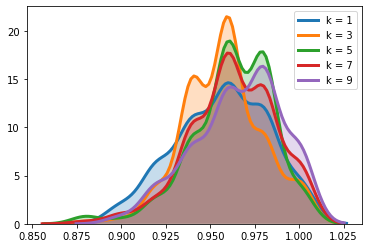

In [792]:
from sklearn.datasets import load_iris

# Load Iris
data_iris = load_iris()
X = data_iris.data
y = data_iris.target



for k in np.arange(1,9+1,2):
    score = []
    for i in range(200):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1./3)
        preds = KNN(X_train, y_train, X_test, ks=[k])
        score.append(np.sum(y_test == preds[k]) / len(y_test))
    sns.distplot(score, hist=False, kde=True, label="k = " + str(k),kde_kws = {'shade': True, 'linewidth': 3})
    #plt.hist(score)
    #plt.title("k = " + str(k))
    #plt.show()

### Cross validation

In [793]:
k = 10
a = np.arange(150)%k
np.random.shuffle(a)
cv_err = []
for i in range(k):
    X_test = X[a == i, :]
    X_train = X[a != i, :]
    y_test = y[a == i]
    y_train = y[a != i]    
    preds = KNN(X_train, y_train, X_test, ks=[3])
    cv_err.append((np.sum(y_test == preds[3]) / len(y_test)))

print("Mean cross validation error:")
np.mean(cv_err)

Mean cross validation error:


0.9733333333333334

In [623]:
#Function to compute error rates
def err_rates(preds, test_Y):
    ret = {}
    for k, preds_k in  preds.items():
        ret[k] = 1 - np.sum(preds_k == test_Y) / len(preds_k)
    return ret

In [618]:
!pip install -q gdown httpimport
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

Downloading...
From: https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU
To: /home/michal/Dokumenty/Studia/UWr/7/Eksploracja_Danych/lista5/mnist.npz
55.4MB [00:02, 27.0MB/s]


In [634]:
with np.load('mnist.npz') as data:
    mnist_full_train_data_uint8 = data['train_data']
    mnist_full_train_labels_int64 = data['train_labels']
    mnist_test_data_uint8 = data['test_data']
    mnist_test_labels_int64 = data['test_labels']

    
    

N = 50000
# Split train data into train and validation sets
mnist_train_data_uint8 = mnist_full_train_data_uint8[:N]
mnist_train_labels_int64 = mnist_full_train_labels_int64[:N]
mnist_valid_data_uint8 = mnist_full_train_data_uint8[N:]
mnist_valid_labels_int64 = mnist_full_train_labels_int64[N:]

data.head()

AttributeError: 'NpzFile' object has no attribute 'head'

In [624]:
# MNIST is large.
# Implement a batched KNN classifier, which processes the test data in small batches
# and returns the error rates

# The code should not run for more than a couple of minutes on the Colab runtime, 
# If it is slower, optimize the distance computation in KNN

def batched_KNN(train_X, train_Y, test_X, ks, verbose=False, batch_size=200):
    all_preds = {k: [] for k in ks}
    for i in range(0, test_X.shape[0], batch_size):
        batch_X = test_X[i:i + batch_size]
        if verbose:
            print(f"Processing batch {i}:{i + batch_X.shape[0]}... ", end='')
            
        # TODO: run KNN on the batch and save the predictions
            predictions = KNN(train_X,train_Y,batch_X,ks,verbose=True)
            for k in all_preds.keys():
        # TODO: combine predictions from batches
                all_preds[k] = np.concatenate((all_preds[k],predictions[k]))
    return all_preds

Processing batch 0:200... Computing distances... Sorting... Computing predictions...Done
Processing batch 200:400... Computing distances... Sorting... Computing predictions...Done
Processing batch 400:600... Computing distances... Sorting... Computing predictions...Done
Processing batch 600:800... Computing distances... Sorting... Computing predictions...Done
Processing batch 800:1000... Computing distances... Sorting... Computing predictions...Done
Processing batch 1000:1200... Computing distances... Sorting... Computing predictions...Done
Processing batch 1200:1400... Computing distances... Sorting... Computing predictions...Done
Processing batch 1400:1600... Computing distances... Sorting... Computing predictions...Done
Processing batch 1600:1800... Computing distances... Sorting... Computing predictions...Done
Processing batch 1800:2000... Computing distances... Sorting... Computing predictions...Done
Processing batch 2000:2200... Computing distances... Sorting... Computing predict

Processing batch 17600:17800... Computing distances... Sorting... Computing predictions...Done
Processing batch 17800:18000... Computing distances... Sorting... Computing predictions...Done
Processing batch 18000:18200... Computing distances... Sorting... Computing predictions...Done
Processing batch 18200:18400... Computing distances... Sorting... Computing predictions...Done
Processing batch 18400:18600... Computing distances... Sorting... Computing predictions...Done
Processing batch 18600:18800... Computing distances... Sorting... Computing predictions...Done
Processing batch 18800:19000... Computing distances... Sorting... Computing predictions...Done
Processing batch 19000:19200... Computing distances... Sorting... Computing predictions...Done
Processing batch 19200:19400... Computing distances... Sorting... Computing predictions...Done
Processing batch 19400:19600... Computing distances... Sorting... Computing predictions...Done
Processing batch 19600:19800... Computing distance

Processing batch 34800:35000... Computing distances... Sorting... Computing predictions...Done
Processing batch 35000:35200... Computing distances... Sorting... Computing predictions...Done
Processing batch 35200:35400... Computing distances... Sorting... Computing predictions...Done
Processing batch 35400:35600... Computing distances... Sorting... Computing predictions...Done
Processing batch 35600:35800... Computing distances... Sorting... Computing predictions...Done
Processing batch 35800:36000... Computing distances... Sorting... Computing predictions...Done
Processing batch 36000:36200... Computing distances... Sorting... Computing predictions...Done
Processing batch 36200:36400... Computing distances... Sorting... Computing predictions...Done
Processing batch 36400:36600... Computing distances... Sorting... Computing predictions...Done
Processing batch 36600:36800... Computing distances... Sorting... Computing predictions...Done
Processing batch 36800:37000... Computing distance

Processing batch 52000:52200... Computing distances... Sorting... Computing predictions...Done
Processing batch 52200:52400... Computing distances... Sorting... Computing predictions...Done
Processing batch 52400:52600... Computing distances... Sorting... Computing predictions...Done
Processing batch 52600:52800... Computing distances... Sorting... Computing predictions...Done
Processing batch 52800:53000... Computing distances... Sorting... Computing predictions...Done
Processing batch 53000:53200... Computing distances... Sorting... Computing predictions...Done
Processing batch 53200:53400... Computing distances... Sorting... Computing predictions...Done
Processing batch 53400:53600... Computing distances... Sorting... Computing predictions...Done
Processing batch 53600:53800... Computing distances... Sorting... Computing predictions...Done
Processing batch 53800:54000... Computing distances... Sorting... Computing predictions...Done
Processing batch 54000:54200... Computing distance

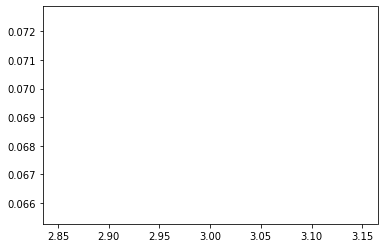

In [629]:
# Now find the best k on the validation set
ks = [1, 3, 5, 7, 9]
mnist_validation_preds = batched_KNN(
    mnist_train_data_uint8.astype('float32').reshape(-1, 28*28), mnist_train_labels_int64,
    mnist_valid_data_uint8.astype('float32').reshape(-1, 28*28),
    ks, verbose=True)

mnist_validation_errs = err_rates(mnist_validation_preds, mnist_valid_labels_int64)
plt.plot(ks, [mnist_validation_errs[k] for k in ks])

# Zadanie 2

### a) criterion
str, optional (default=”gini”)
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

In [418]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [419]:
# Load data
titanic_df = pd.read_csv("/home/michal/Dokumenty/Studia/UWr/7/Eksploracja_Danych/lista5/titanic.csv", sep="\t")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [421]:
# Remove NANs
#titanic_df = titanic_df.dropna()

# Encode Embarked
#le = preprocessing.LabelEncoder()
#le.fit(list(titanic_df['Embarked']))
#titanic_df['Embarked'] = le.transform(list(titanic_df['Embarked']))

# Encode sex as binary 0 - male, 1 - female
titanic_df['Sex'] = (titanic_df['Sex'] == 'female').astype(int)

# Fill NAs in age as mean of total age
titanic_df['Age'].fillna((titanic_df['Age'].mean()), inplace=True)

# Show data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [422]:
X = titanic_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1).values
y = titanic_df['Survived'].values


# Fit Tree with gini criterion
gini_clf = DecisionTreeClassifier(criterion = "gini", max_depth=None, min_samples_leaf=1)
gini_clf.fit(X, y)

# Fit Tree with entropy
entropy_clf = DecisionTreeClassifier(criterion = "entropy", max_depth=None, min_samples_leaf=1)
entropy_clf.fit(X, y)


# Print Scores
print(f"Gini classifier score: {gini_clf.score(X, y)}")
print(f"Entropy classifier score: {entropy_clf.score(X, y)}")

print(f"CV score for gini classifier: {np.mean(cross_val_score(gini_clf, X, y, cv=10))}")
print(f"CV score for entropy classifier: {np.mean(cross_val_score(entropy_clf, X, y, cv=10))}")


Gini classifier score: 1.0
Entropy classifier score: 1.0
CV score for gini classifier: 0.7058333333333333
CV score for entropy classifier: 0.7375


### b) Split on training set and test set 

CV score for gini classifier: 0.7116666666666667
CV score for entropy classifier: 0.7045833333333332
Gini. Test score: 0.7021276595744681 , Train score: 1.0
Entropy. Test score: 0.7021276595744681 , Train score: 1.0


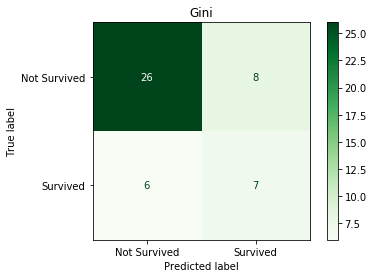

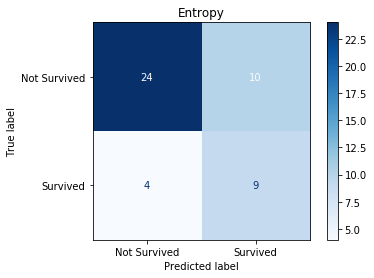

In [432]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Fit Tree with gini criterion
gini_clf = DecisionTreeClassifier(criterion = "gini", max_depth=None, min_samples_leaf=1)
gini_clf.fit(X_train, y_train)

# Fit Tree with entropy
entropy_clf = DecisionTreeClassifier(criterion = "entropy", max_depth=None, min_samples_leaf=1)
entropy_clf.fit(X_train, y_train)


# Print CV Score
print(f"CV score for gini classifier: {np.mean(cross_val_score(gini_clf, X, y, cv=10))}")
print(f"CV score for entropy classifier: {np.mean(cross_val_score(entropy_clf, X, y, cv=10))}")


# Print Scores
print(f"Gini. Test score: {gini_clf.score(X_test,y_test)} , Train score: {gini_clf.score(X_train,y_train)}")
print(f"Entropy. Test score: {entropy_clf.score(X_test,y_test)} , Train score: {entropy_clf.score(X_train,y_train)}")

# Plot confusion matrix
plot_confusion_matrix(gini_clf, X_test, y_test,display_labels=['Not Survived', 'Survived'],cmap=plt.cm.Greens)
plt.title('Gini')
plot_confusion_matrix(entropy_clf, X_test, y_test,display_labels=['Not Survived', 'Survived'],cmap=plt.cm.Blues)
plt.title('Entropy')
plt.show()

### c)

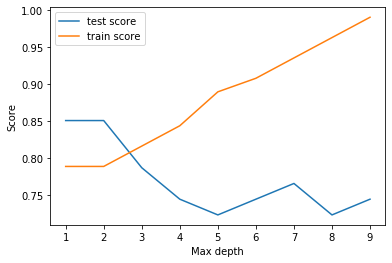

In [431]:
test_score = []
train_score = []
n_depth = 10
for i in range(1,n_depth):
    gini_clf = DecisionTreeClassifier(criterion = "gini", max_depth=i, min_samples_leaf=1, random_state=0)
    gini_clf.fit(X_train, y_train)
    train_score.append(gini_clf.score(X_train, y_train))
    test_score.append(gini_clf.score(X_test, y_test))
    
plt.plot(range(1,n_depth),test_score)
plt.plot(range(1,n_depth),train_score)
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.legend(labels=['test score', 'train score'])
plt.show()

### e)

In [417]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(gini_clf, X, y, cv=10))

0.7316666666666667

# Zadanie 3

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

## 3.1 Iris

Text(0.5, 1.0, 'Extremely Randomize Tree')

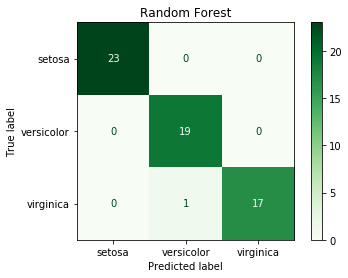

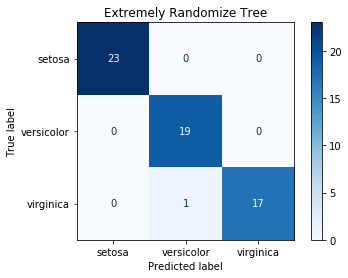

In [317]:
from sklearn.datasets import load_iris

# Load Iris
data_iris = load_iris()
X = data_iris.data
y = data_iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Fit Random Forest
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

# Fit Extremely Randomize Tree
etc = ExtraTreesClassifier(n_estimators=100)
etc.fit(X_train, y_train)

# Plot confusion matrix
plot_confusion_matrix(rfc, X_test, y_test,display_labels=data_iris.target_names,cmap=plt.cm.Greens)
plt.title('Random Forest')
plot_confusion_matrix(etc, X_test, y_test,display_labels=data_iris.target_names,cmap=plt.cm.Blues)
plt.title('Extremely Randomize Tree')

## 3.2 Titanic

In [781]:
from sklearn import preprocessing

In [782]:
# Load data
titanic_df = pd.read_csv("/home/michal/Dokumenty/Studia/UWr/7/Eksploracja_Danych/lista5/titanic.csv", sep="\t")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [783]:
# Remove NANs
#titanic_df = titanic_df.dropna()

# Encode Embarked
#le = preprocessing.LabelEncoder()
#le.fit(list(titanic_df['Embarked']))
#titanic_df['Embarked'] = le.transform(list(titanic_df['Embarked']))

# Encode sex as binary 0 - male, 1 - female
titanic_df['Sex'] = (titanic_df['Sex'] == 'female').astype(int)

# Fill NAs in age as mean of total age
titanic_df['Age'].fillna((titanic_df['Age'].mean()), inplace=True)

# Show data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


Random forest. Test score: 0.8085106382978723 , Train score: 1.0
Extremly Randomized Trees. Test score: 0.8297872340425532 , Train score: 1.0


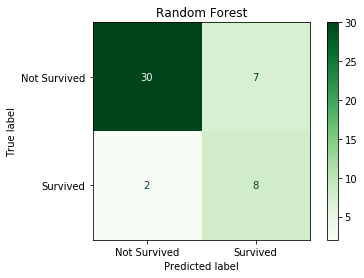

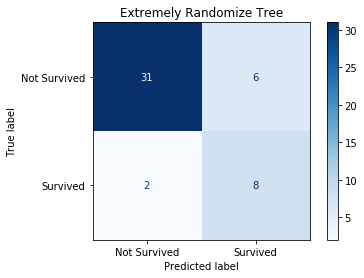

In [784]:
X = titanic_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1).values
y = titanic_df['Survived'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Fit Random Forest
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)

# Fit Extremely Randomize Tree
etc = ExtraTreesClassifier(n_estimators=500)
etc.fit(X_train, y_train)


# Print Scores
print(f"Random forest. Test score: {rfc.score(X_test,y_test)} , Train score: {rfc.score(X_train,y_train)}")
print(f"Extremly Randomized Trees. Test score: {etc.score(X_test,y_test)} , Train score: {etc.score(X_train,y_train)}")

# Plot confusion matrix
plot_confusion_matrix(rfc, X_test, y_test,display_labels=['Not Survived', 'Survived'],cmap=plt.cm.Greens)
plt.title('Random Forest')
plot_confusion_matrix(etc, X_test, y_test,display_labels=['Not Survived', 'Survived'],cmap=plt.cm.Blues)
plt.title('Extremely Randomize Tree')
plt.show()


In [786]:
np.mean(cross_val_score(rfc,X,y))

0.7368951612903226

In [789]:
np.mean(cross_val_score(etc,X,y))

0.7497983870967742

# Zadanie 4

In [364]:
# Load mushroom data
columns = [
 "target", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor", 
 "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", 
 "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
 "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", 
 "ring-number", "ring-type", "spore-print-color", "population", "habitat", ]

# Use read_csv to load the data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
mushroom_df = pd.read_csv(url, header=None, names=columns)

# Show data
mushroom_df.head()

,target,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [367]:

from sklearn import preprocessing


X = mushroom_df.drop(['target'], axis=1).values
y = mushroom_df['target'].values

# Encode all variables as dummy variables
enc = preprocessing.OneHotEncoder(sparse=False)
enc.fit(X)
X = enc.transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


dcf = DecisionTreeClassifier(criterion = "gini", max_depth=8, min_samples_leaf=5)
dcf.fit(X_train, y_train)   



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [368]:
feature_names = list(mushroom_df.drop(['target'], axis=1).columns)

cat_feature_names = []
for i in range(len(feature_names)):
    cat_feature_names.append(feature_names[i] + " is " + enc.categories_[i])

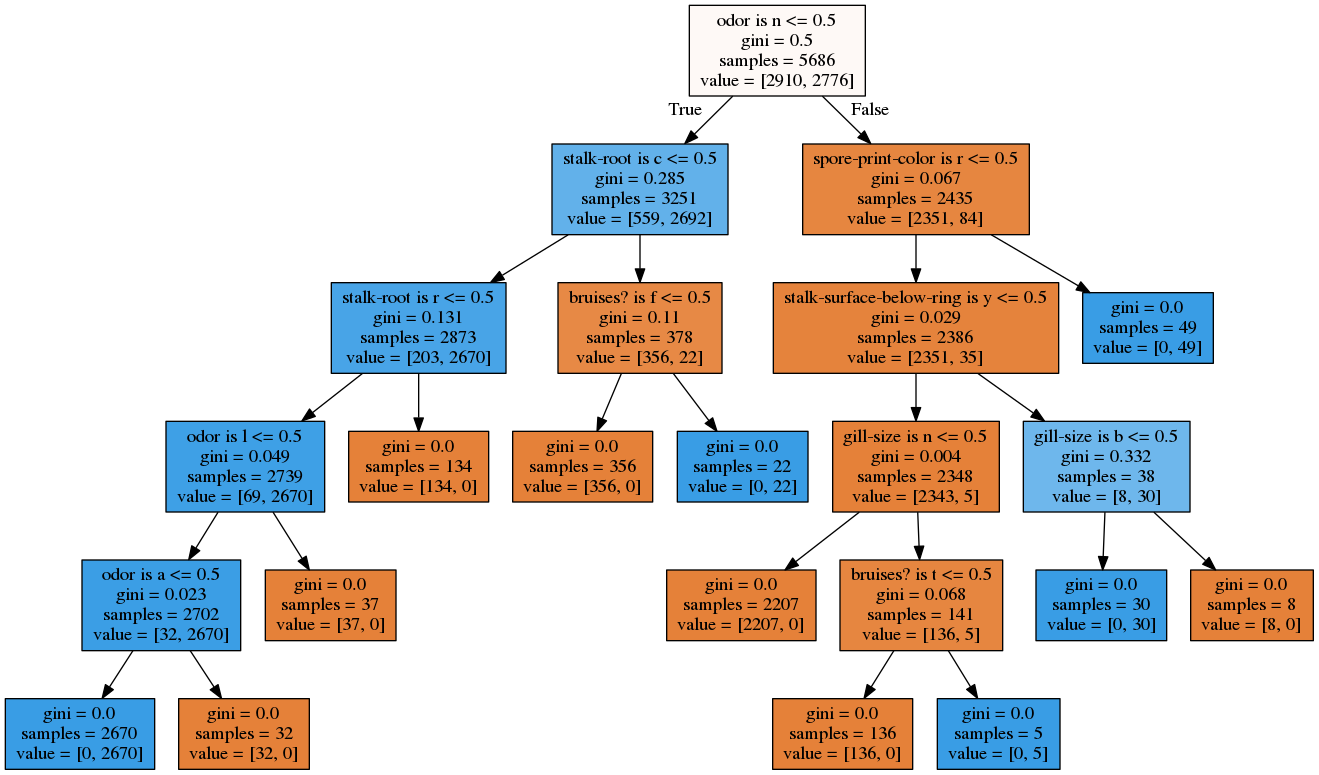

In [369]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = export_graphviz(dcf, out_file=None, filled=True, feature_names = np.concatenate(cat_feature_names))

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

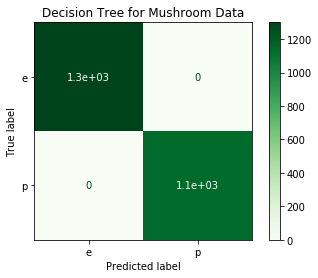

In [312]:
plot_confusion_matrix(dcf, X_test, y_test,cmap=plt.cm.Greens)
plt.title('Decision Tree for Mushroom Data')
plt.show()

# Zadanie 5

In [314]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target']
car_df = pd.read_csv("/home/michal/Dokumenty/Studia/UWr/7/Eksploracja_Danych/lista5/car.csv", sep=",",header=None, names=columns)
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [315]:
cat_to_num = {"buying": {"low": 1, "med": 2, "high" : 3, "vhigh" : 4},
                "doors": {"2": 2, "3": 3, "4" : 4, "5more" : 5},
                "maint":  {"low": 1, "med": 2, "high" : 3, "vhigh" : 4},
                "persons":  {"2": 2, "4": 4, "more" : 6},
                "lug_boot":  {"small": 1, "med": 2, "big" : 3},
               "safety":  {"low": 1, "med": 2, "high" : 3}}
car_df.replace(cat_to_num, inplace=True)
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc


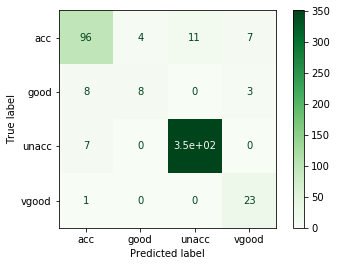

In [267]:
X = car_df.drop('target', axis=1).values
y = car_df['target'].values

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

dcf = DecisionTreeClassifier(criterion = "gini", random_state = 100, 
                               max_depth=None, min_samples_leaf=10)
dcf.fit(X_train, y_train)  

plot_confusion_matrix(dcf, X_test, y_test,cmap=plt.cm.Greens)

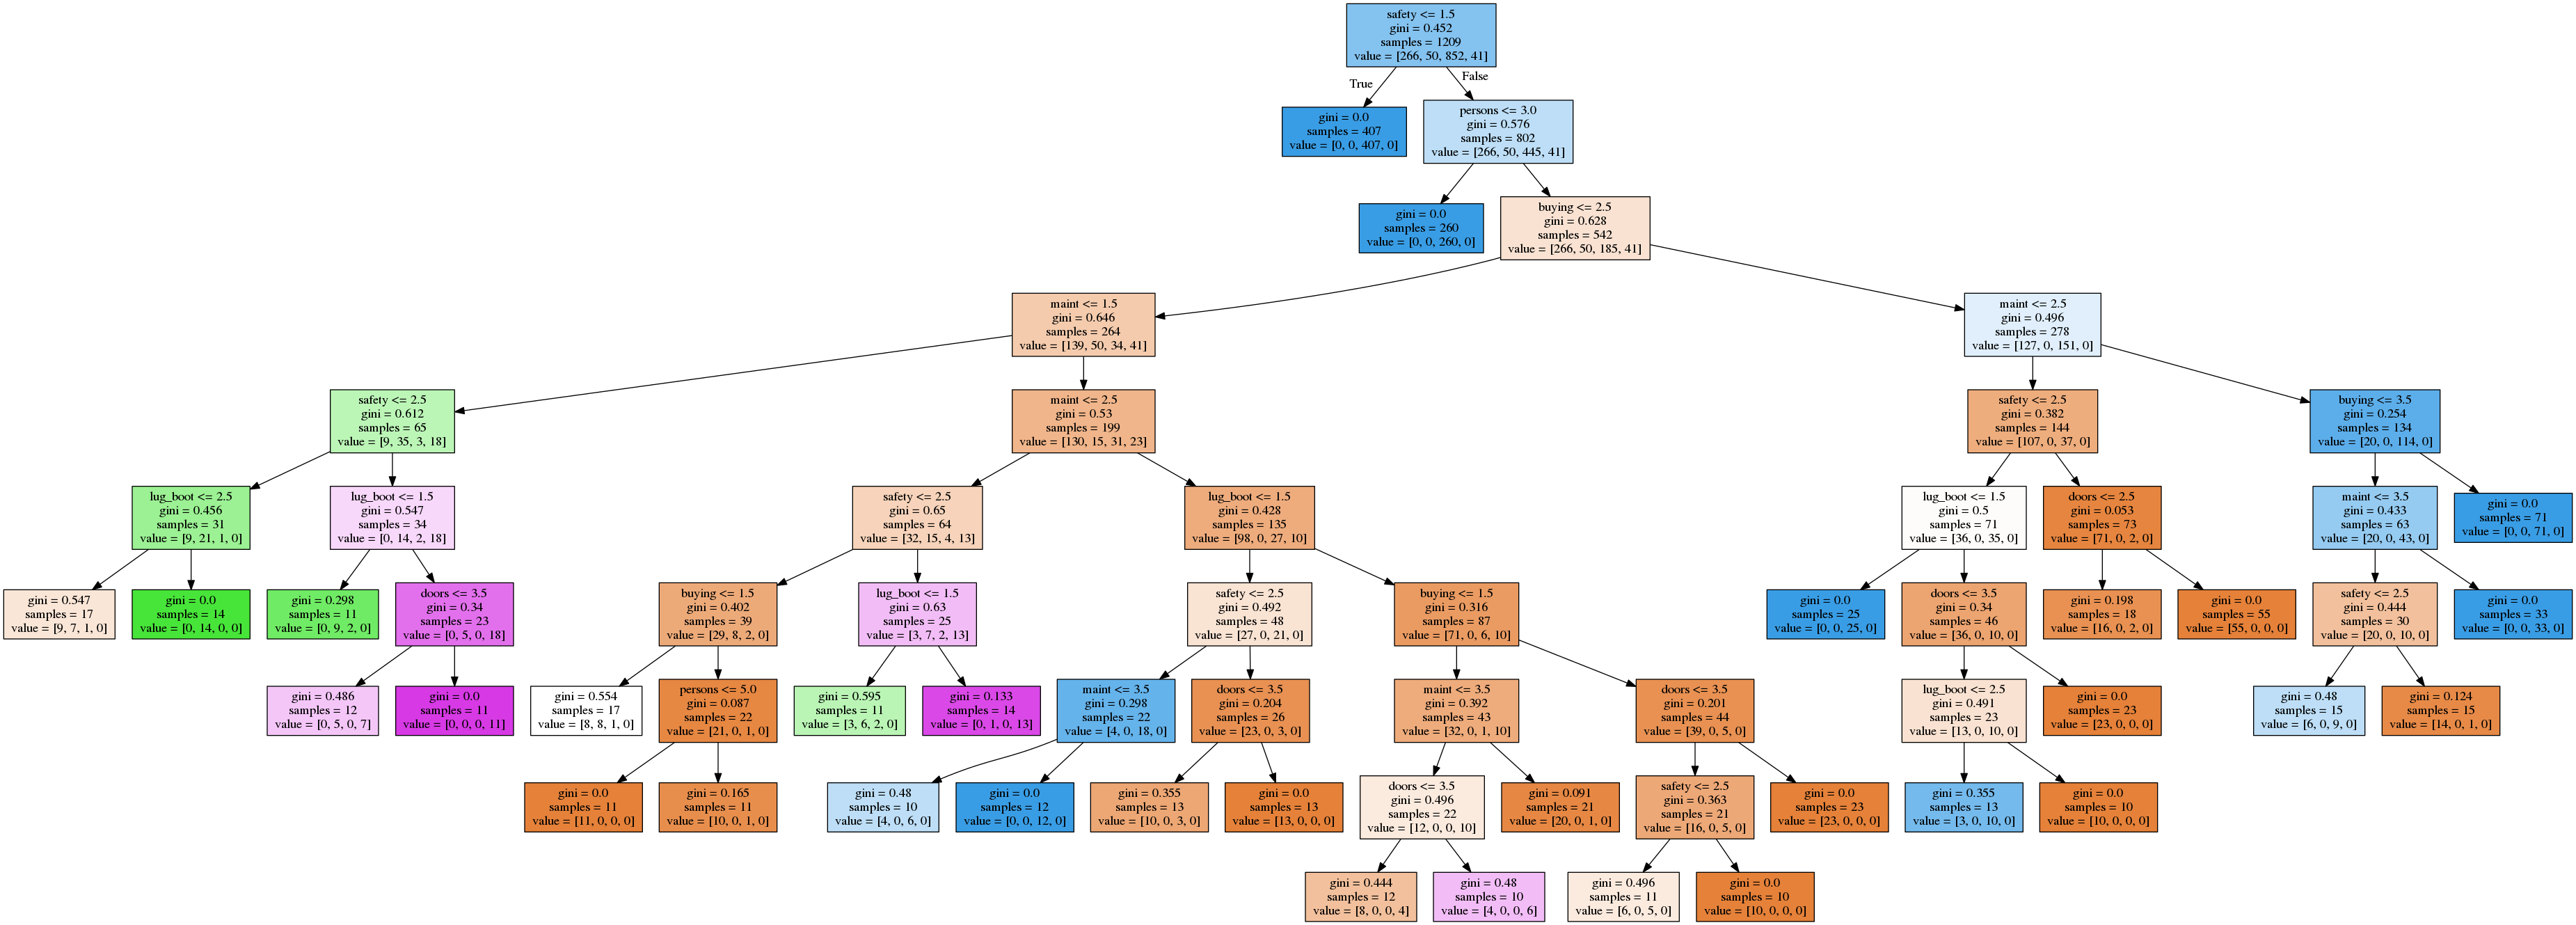

In [268]:
# Create DOT data
dot_data = export_graphviz(dcf, out_file=None, filled=True, feature_names = car_df.drop('target', axis=1).columns)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())